# alphadia-validate
A notebook for exploring DIA hits for the sake of validation.

In [30]:
%reload_ext autoreload
%autoreload 2

In [31]:
import os

from pathlib import Path
from showcase.slicer import SpectrumSlicer

from showcase.isoform_attention import isoform_attention_plot
from showcase.io import prepare_data
from IPython.display import Image


## 0. Set up data

In [32]:
main_folder = Path(os.environ.get("BASE_FOLDER", "~//alphadia-validate/")).expanduser()

In [33]:
precursor_df, spectral_library, spectral_library_flat, dia_data = prepare_data(
    main_folder
)

## 1. Select a precursor

In [34]:
# user input: select a hash
selected_hash = precursor_df["mod_seq_charge_hash"].iloc[3000]

# alternatively: use a random one from a certain percentile
# from showcase.small_helpers import get_random_precursor_hash
# selected_hash = get_random_precursor_hash(precursor_df, 0)

## 2. Preprocess

In [35]:
library_wrapper = SpectrumSlicer(spectral_library_flat, precursor_df, dia_data)

mz_library, intensity_library, spectrum_slice, fragment_library = library_wrapper.get_by_hash(
    selected_hash
)

## 3. Plots

### Mirror plots


In [36]:
from mirror_plotting import mirror_w_xic_w_corrs

precursor_entry = precursor_df[precursor_df['mod_seq_charge_hash'] == selected_hash].iloc[0]

mirror_w_xic_w_corrs(spectrum_slice, mz_library, intensity_library, 
                 fragment_library, precursor_entry,
                 width=500, height=300)

alt.HConcatChart(...)

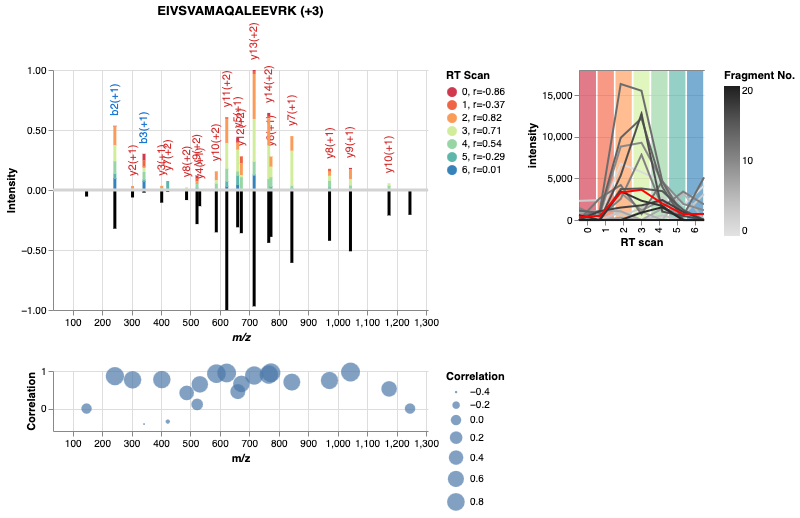

In [39]:
# this is just for display on GitHub as it does not show altair plots
Image(filename='../misc/mirror.png')

In [15]:
#plot_mirror_2(spectrum_slice, mz_library, intensity_library, )

### Isoform attention plot

sequence     EIVSVAMAQALEEVRK
mods                         
mod_sites                    
Name: 3000, dtype: object


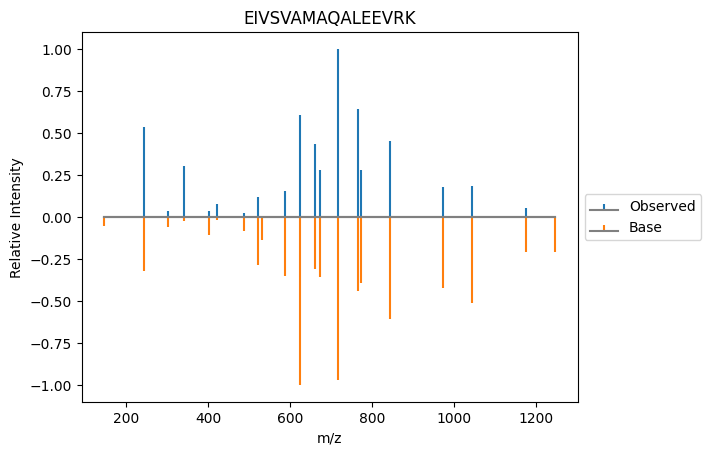

In [40]:
# in case you want to find some precursors with modifications:
# display(precursor_df[~pd.isna(precursor_df["mods"])][["mod_seq_charge_hash", "mods"]].head(10))

isoform_attention_plot(spectral_library_flat, precursor_df, dia_data, selected_hash)

### Shared fragments
In order to play with that plot, use the `shared_fragment_histogram.ipynb` notebook.

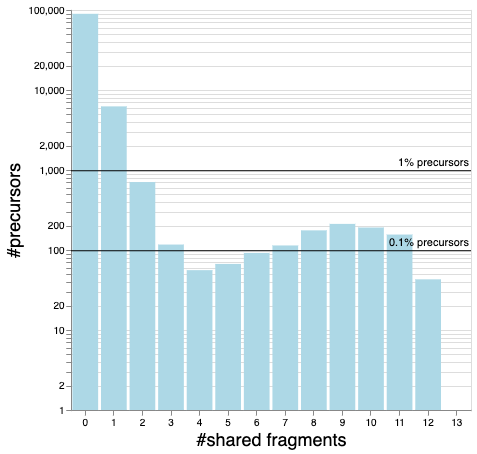

In [41]:
Image(filename='../misc/shared_fragment_histogram.png')